<a href="https://colab.research.google.com/github/dansarmiento/ColaboratoryNotebooks/blob/main/CMS_API_StrongStart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import requests

data source: https://data.cms.gov/cms-innovation-center-programs/strong-start-for-mothers-and-newborns-initiative/strong-start-awardees
The Strong Start Awardees dataset provides information on the financial awards made to participants in the Strong Start for Mothers and Newborns Initiative. This initiative tested three evidence-based maternity care service approaches with the goal of improving health outcomes of pregnant women and newborns. The data can include the participant name, participant location, locations of practices participating under the participants’ umbrella practice, descriptive text for the type(s) of enhanced prenatal care provided, and the amount of funding awarded to the participant as a result of their participation in year 1 of the initiative.

In [4]:
response = requests.get('https://data.cms.gov/data-api/v1/dataset/647e8a75-2135-49a0-83a8-f3b12f687d18/data')

if response.ok:
  payload = response.json()
else:
  print(f'Request unsuccessful: {response.status_code}')
  payload = None

In [5]:
df = pd.DataFrame(payload)
df.head()

,Awardee,Awardee State,Enhanced Prenatal Care Approaches,Location of the Enhanced Prenatal Care Services,Award Amount (Year 1)
0,Meridian Health Plan,"MI (44.661320000317914, -84.71438999959867)",Maternity Care Home,Jackson,249939
1,"American Association of Birth Centers, Inc.","PA (40.79372999993973, -77.86069999960512)",Birth Centers,"Anchorage, AK; Juneau, AK; Wasilla, AK; Rogers...",1585122
2,Texas Tech University Health Sciences Center,"TX (31.82724000022597, -99.42676999973554)",Maternity Care Home & Group/Centering,Lubbock,260670
3,HealthInsight of Nevada,"NV (39.49323999972637, -117.07183999971608)",Group/Centering,Las Vegas and Reno,544126
4,Amerigroup Corporation,"VA (37.54268000028196, -78.45789000012326)",Group/Centering,"Baton Rouge, LA; New Orleans, LA; and Shrevepo...",608742


In [9]:
df.columns = df.columns.str.replace(' ','_')

In [14]:
df.rename(columns={'Location_of_the_Enhanced_Prenatal_Care_Services':'Location','Award_Amount_(Year_1)_':'Award_Amount', 'Enhanced_Prenatal_Care_Approaches':'Approaches'}, inplace=True)

In [15]:
df.columns

Index(['Awardee', 'Awardee_State', 'Approaches', 'Location', 'Award_Amount'], dtype='object')

In [16]:
df.head()

,Awardee,Awardee_State,Approaches,Location,Award_Amount
0,Meridian Health Plan,"MI (44.661320000317914, -84.71438999959867)",Maternity Care Home,Jackson,249939
1,"American Association of Birth Centers, Inc.","PA (40.79372999993973, -77.86069999960512)",Birth Centers,"Anchorage, AK; Juneau, AK; Wasilla, AK; Rogers...",1585122
2,Texas Tech University Health Sciences Center,"TX (31.82724000022597, -99.42676999973554)",Maternity Care Home & Group/Centering,Lubbock,260670
3,HealthInsight of Nevada,"NV (39.49323999972637, -117.07183999971608)",Group/Centering,Las Vegas and Reno,544126
4,Amerigroup Corporation,"VA (37.54268000028196, -78.45789000012326)",Group/Centering,"Baton Rouge, LA; New Orleans, LA; and Shrevepo...",608742


In [20]:
df[['State','GPS']] = df['Awardee_State'].str.split(' \(', expand=True)
# need to split this column
#df[['A', 'B']] = df['AB'].str.split(' ', 1, expand=True)


In [22]:
df.State[0]

'MI'

In [24]:
df.GPS[0]

'44.661320000317914, -84.71438999959867)'

In [25]:
df[['Latitude','Longitude']] = df['GPS'].str.split(',', expand=True)

In [28]:
df.Longitude = df.Longitude.str.replace(')','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [30]:
df.Longitude[0]

' -84.71438999959867'

In [32]:
df.drop(['Awardee_State','GPS'], axis=1, inplace=True)

In [33]:
df.head()

,Awardee,Approaches,Location,Award_Amount,State,Latitude,Longitude
0,Meridian Health Plan,Maternity Care Home,Jackson,249939,MI,44.661320000317914,-84.71438999959867
1,"American Association of Birth Centers, Inc.",Birth Centers,"Anchorage, AK; Juneau, AK; Wasilla, AK; Rogers...",1585122,PA,40.79372999993973,-77.86069999960512
2,Texas Tech University Health Sciences Center,Maternity Care Home & Group/Centering,Lubbock,260670,TX,31.82724000022597,-99.42676999973554
3,HealthInsight of Nevada,Group/Centering,Las Vegas and Reno,544126,NV,39.49323999972637,-117.07183999971608
4,Amerigroup Corporation,Group/Centering,"Baton Rouge, LA; New Orleans, LA; and Shrevepo...",608742,VA,37.54268000028196,-78.45789000012326


In [39]:
df.Approaches.value_counts()

Group/Centering                                         12
Maternity Care Home                                     11
Birth Centers                                            1
Maternity Care Home & Group/Centering                    1
Group/Centering, Maternity Care Home, & Birth Center     1
Group/Centering & Maternity Care Home                    1
Name: Approaches, dtype: int64

In [45]:
df.Award_Amount = df.Award_Amount.astype(int)

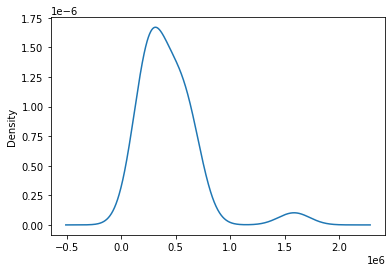

In [46]:
df.Award_Amount.plot(kind='kde')
# this was right the whole time, I just didn't realize the scale of the numbers was millions 

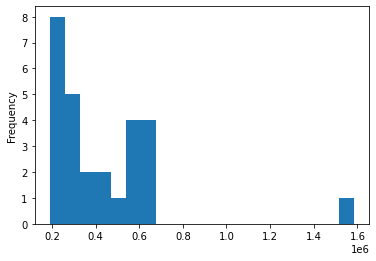

In [53]:
df.Award_Amount.plot(kind='hist', bins=20)

In [48]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

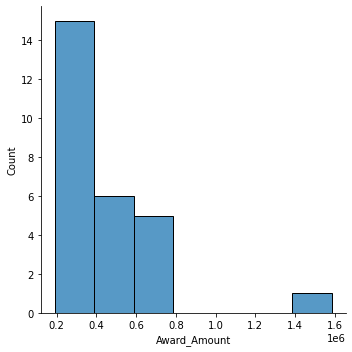

In [49]:
sns.displot(data = df, x='Award_Amount')

In [50]:
df.Award_Amount.value_counts()

249939     1
219473     1
590904     1
215734     1
618334     1
281278     1
322367     1
190176     1
243207     1
262731     1
557848     1
488476     1
239980     1
259336     1
1585122    1
361463     1
206332     1
466046     1
587038     1
320269     1
459511     1
614909     1
664390     1
608742     1
544126     1
260670     1
355822     1
Name: Award_Amount, dtype: int64

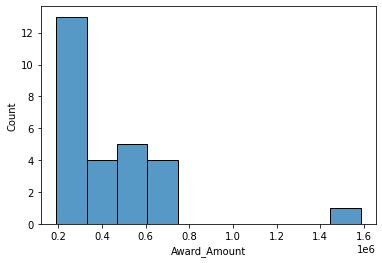

In [51]:
sns.histplot(data=df, x='Award_Amount', bins=10)